In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append("../src")
from numpy_filterbank import * 
%matplotlib inline

In [2]:
hyperparam_vals = np.load("../loss_records/hyperparam_vals_1.npy")
loss_values = np.load("../loss_records/delta_opt_1.npy")

images = np.load("../data/simulated/pr_train_simulated.npy")

In [3]:
loss_values.shape

(10, 8, 2, 2, 40)

In [4]:
loss_values[np.isnan(loss_values)] = 1e4

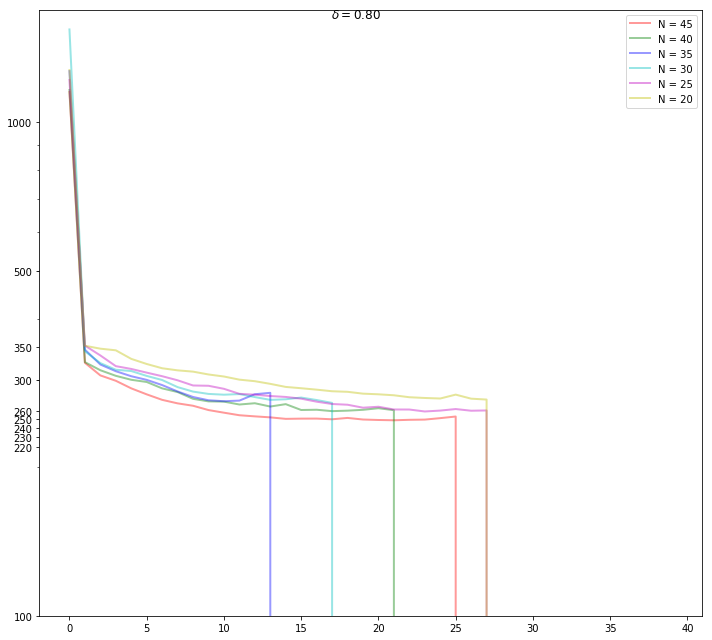

In [5]:
fig, ax = plt.subplots(figsize=(10, 9))

delta_loc = 0
delta_val = hyperparam_vals[0][delta_loc]

fig.suptitle(r"$\delta = {:4.2f}$".format(delta_val))
ax.plot(np.arange(40), loss_values[delta_loc, -1, 0, 0, :], "r-", linewidth=2, alpha = .4, 
        label = "N = {}".format(hyperparam_vals[1][-1])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -2, 0, 0, :], "g-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-2])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -3, 0, 0, :], "b-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-3])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -4, 0, 0, :], "c-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-4])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -5, 0, 0, :], "m-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-5])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -6, 0, 0, :], "y-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-6])
    )

ax.set_yscale("log")

plt.legend()
ax.set_yticks([100, 220, 230, 240, 250, 260, 300, 350, 500, 1000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()

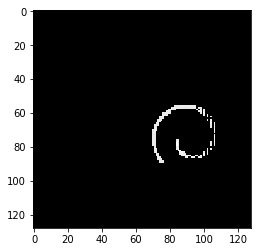

In [6]:
selected = images[3].reshape((1, 128, 128))
plt.imshow(selected.reshape((128, 128)), cmap="Greys_r")

90 80 0.1 1.5 1


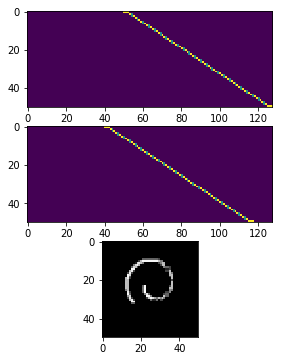

In [14]:
sigma_sq = 0.1
gamma = 1

gx = 90
gy = 80

delta = 1.5

N = 50
H = 128
W = 128
#gx, gy, sigma_sq, delta, gamma = attn_params(gx, gy, logsigma, delta, loggamma, N)

print(gx, gy, sigma_sq, delta, gamma)
Fx, Fy = filters(gx, gy, sigma_sq, delta, gamma, N) 

#eq 27  Fy x Fx T

#read op 
Fx_t = np.transpose(Fx, axes=[0, 2, 1])
tmp = np.einsum("ijk, ikn -> ijn", selected, Fx_t)
out = np.einsum("ijk, ikn -> ijn", Fy, tmp)


fig, axs = plt.subplots(nrows = 3, figsize = (10, 6))

axs[0].imshow(Fx.reshape((N, H)))
axs[1].imshow(Fy.reshape((N, H)))
axs[2].imshow(out.reshape((N, N)), cmap="Greys_r")

In [8]:
Mfx = Fx.copy()
Mfx[Mfx>0.5] = 1e3
Mfx[Mfx<0.5] = 0


Mfy = Fy.copy()
Mfy[Mfy>0.5] = 1e3
Mfy[Mfy<0.5] = 0

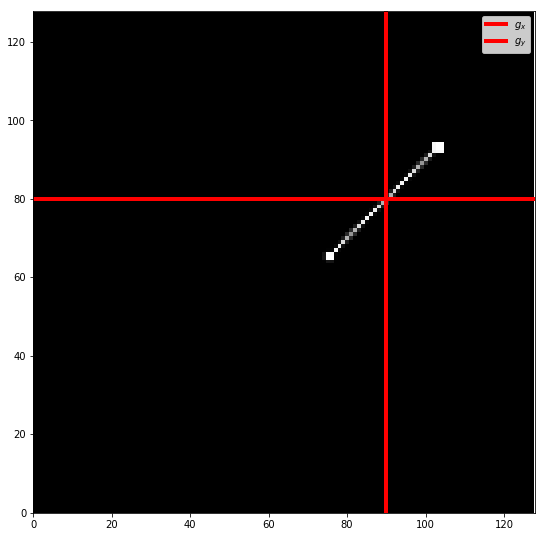

In [9]:
test = np.einsum("inh, inw-> ihw", Fy, Fx)

fig, ax = plt.subplots(figsize=(9, 10))
ax.set_xlim((0, 128))
ax.set_ylim((0, 128))

ax.imshow(test.reshape((128, 128)), cmap="Greys_r")

ax.plot([gx, gx], [0, 128], "r", label=r"$g_x$", linewidth = 4)
ax.plot([0, 128], [gy, gy], "r", label=r"$g_y$", linewidth = 4)

plt.legend()